# EDA & Hypothesis testing - Insurance dataset

## Import the necessary libraries 

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, wilcoxon, chi2_contingency, f_oneway
from statsmodels.stats.proportion import proportions_ztest

## Read the data as a data frame

In [88]:
dataset = pd.read_csv('insurance.csv') ## please ensure that the insurance.csv file is in the same directory as this ipynb
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

### Shape of the data

In [89]:
print('Rows in the dataset:', dataset.shape[0])
print('Columns in the dataset:', dataset.shape[1])

Rows in the dataset: 1338
Columns in the dataset: 7


### Data type of each attribute

In [90]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Checking the presence of missing values

In [91]:
dataset.isnull().values.any()

False

In [92]:
dataset.isna().values.any()

False

As seen above there are no missing values in the dataset

### 5 point summary of numerical attributes

In [93]:
fivepoints = dataset.describe().T
fivepoints

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Observation from five point summary:
1. **Age** - mean and medians are close enough. Evenly distributed
2. **bmi** - mean and medians are close enough. Evenly distributed
3. **children** - categorical variable
4. **charges** - mean is greater than median suggesting that data is right skewed

### Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

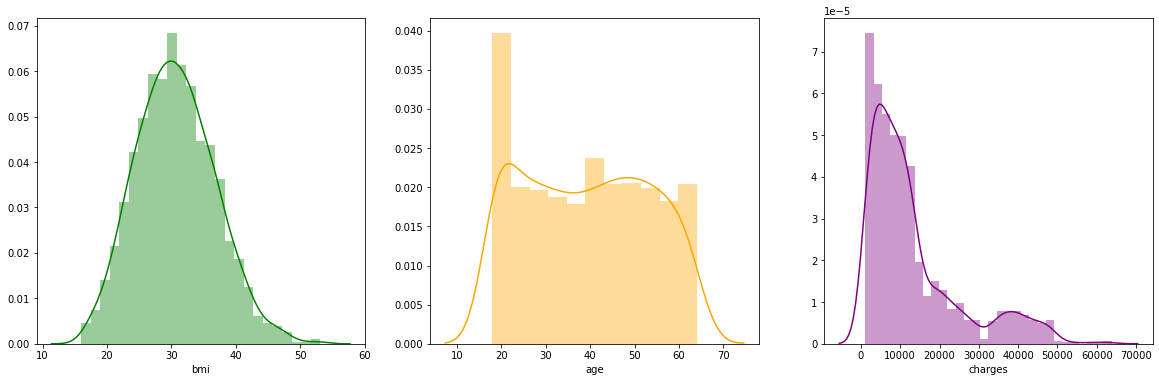

In [94]:
f, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.distplot(dataset.bmi, color='green', ax=axes[0])
sns.distplot(dataset.age, color='orange', ax=axes[1])
sns.distplot(dataset.charges, color='purple', ax=axes[2])

1. **BMI** - Normally Distributed
2. **AGE** - Evenly distributed
3. **CHARGES** - Positively skewed

### Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 

In [95]:
print('---Higher the deviation from 0 more the skewness----')
print('---Positive numver denotes right skewed data and negative number left skewed data-----')
print(dataset['age'].skew())
print(dataset['bmi'].skew())
print(dataset['charges'].skew())

---Higher the deviation from 0 more the skewness----
---Positive numver denotes right skewed data and negative number left skewed data-----
0.05567251565299186
0.2840471105987448
1.5158796580240388


### Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 

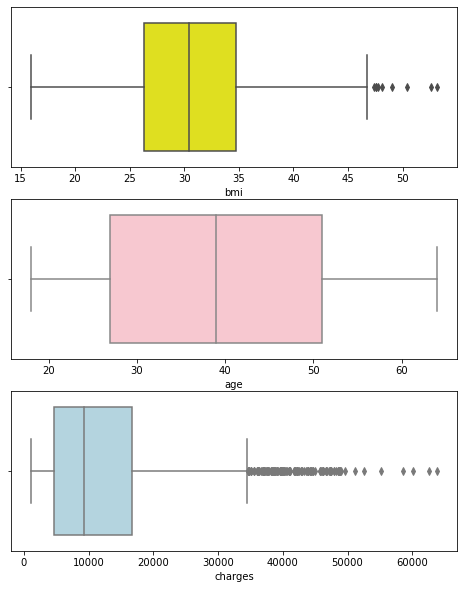

In [98]:
f, axes = plt.subplots(3, 1, figsize=(8, 10))

sns.boxplot(dataset.bmi, color='yellow', ax = axes[0])
sns.boxplot(dataset.age, color='pink', ax = axes[1])
sns.boxplot(dataset.charges, color='lightblue', ax = axes[2])

1. **BMI** - Few outliers
2. **AGE** - No outliers
3. **Charges** - Many outliers, right skewed

### Distribution of categorical columns (include children)

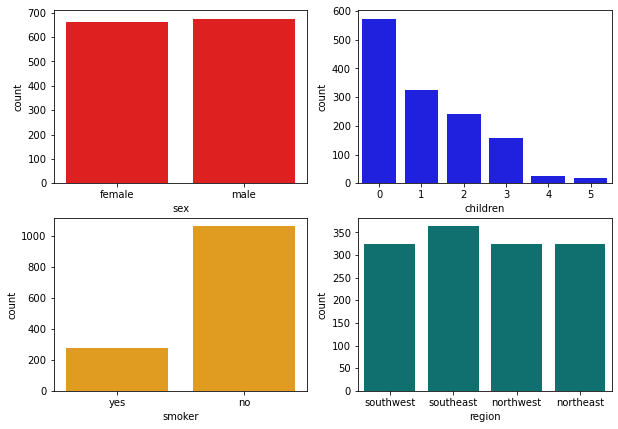

In [99]:
f, axes = plt.subplots(2, 2, figsize=(10, 7))

sns.countplot(dataset.sex, color = 'red', ax=axes[0,0])
sns.countplot(dataset.children, color='blue', ax=axes[0,1])
sns.countplot(dataset.smoker, color='orange', ax=axes[1,0])
sns.countplot(dataset.region, color='teal', ax=axes[1,1])

### Pair plot that includes all the columns of the data frame

In [100]:
## Make a copy of the original dataset
df = dataset.copy()

In [101]:
## Check the unique values in Nominal/ordinal variables
print(df.sex.unique())
print(df.smoker.unique())
print(df.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [102]:
## Convert the Nominal/ordinal data into numerical data
df.sex = df.sex.replace({'male': 0, 'female': 1})
df.smoker = df.smoker.replace({'yes': 1, 'no' : 0})
df.region = df.region.replace({'southwest' : 0, 'southeast' : 1, 'northwest' : 2, 'northeast' : 3})

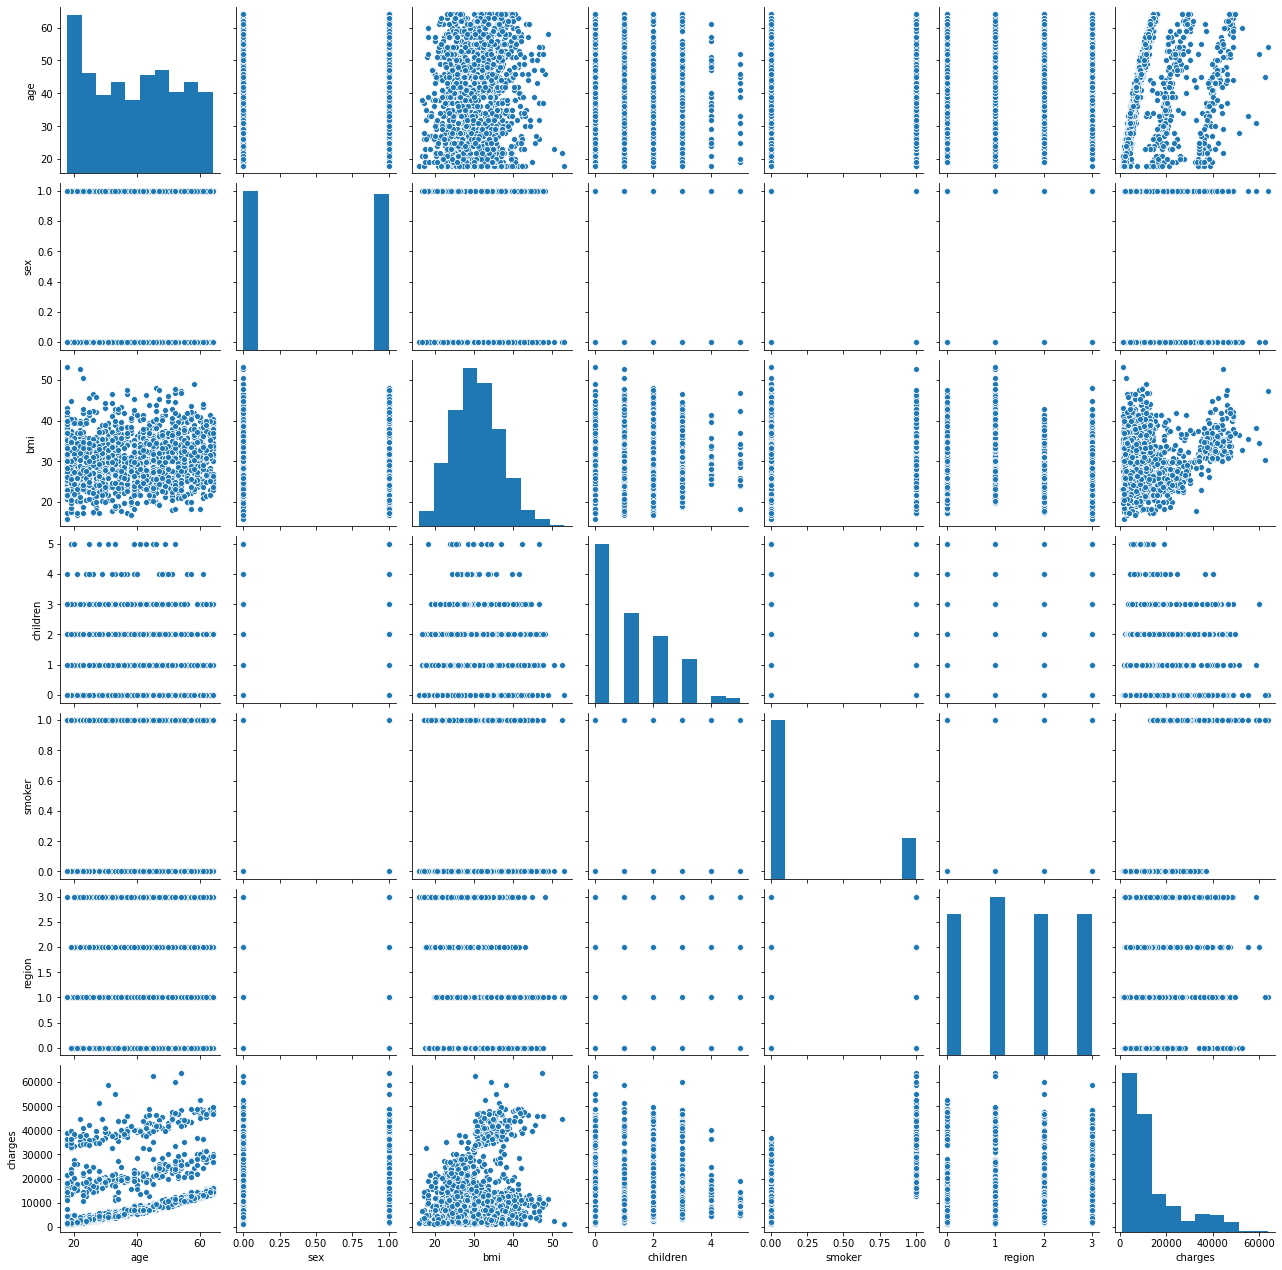

In [103]:
sns.pairplot(df)

## Answer the following questions with statistical evidence

### Do charges of people who smoke differ significantly from the people who don't?

* H0 - Charges of people who smoke is same as those who don't
* H1 - Charges of people who smoke is different as those who don't

In [104]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
smokers = dataset[dataset.smoker=='yes']['charges'] ## charges of all smokers
non_smokers = dataset[dataset.smoker=='no']['charges'] ## charges of all non-smokers

In [106]:
print(smokers.shape)
print(non_smokers.shape)

(274,)
(1064,)


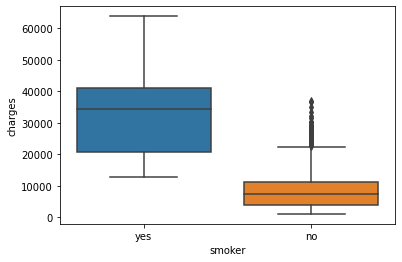

In [107]:
sns.boxplot('smoker', 'charges', data=dataset)

In [108]:
type1error = 0.05 ## setting alpha as 0.05

t_stat, p_value = ttest_ind(smokers, non_smokers)
print(t_stat, p_value)

46.664921172723716 8.271435842177219e-283


In [109]:
## function that compares p_value and the defined alpha
def evaluateNullHypothesis(p_value, type1error):
    if p_value < type1error:  
        print(f'As the p_value ({p_value}) < 0.05, we reject the Null Hypothesis.')
    else:
        print(f'As the p_value ({p_value}) > 0.05, we fail to reject Null Hypothesis')

In [110]:
evaluateNullHypothesis(p_value, type1error)

As the p_value (8.271435842177219e-283) < 0.05, we reject the Null Hypothesis.


### Does bmi of males differ significantly from that of females?

* H0 - BMI of males is similar to females
* H1 - BMI of males is differ significantly from females

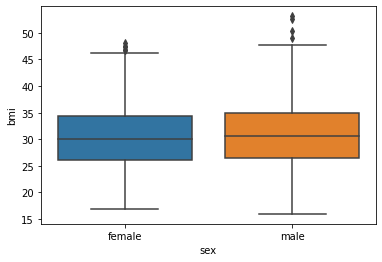

In [111]:
sns.boxplot('sex', 'bmi', data=dataset)

In [112]:
males_bmi = dataset[dataset.sex=='male']['bmi'] ## BMIs of males in the dataset
females_bmi = dataset[dataset.sex=='female']['bmi'] ## BMIs of females in the dataset

In [113]:
t_stat, p_value = ttest_ind(males_bmi, females_bmi)
print(t_stat, p_value)

1.696752635752224 0.08997637178984932


In [114]:
evaluateNullHypothesis(p_value, type1error)

As the p_value (0.08997637178984932) > 0.05, we fail to reject Null Hypothesis


### Is the proportion of smokers significantly different in different genders?

* H0 - proportion of smokers similar in different genders
* H1 - proportion of smokers significantly different in different genders

In [115]:
smokers = dataset[dataset.smoker=='yes'] ## dataset with all smokers

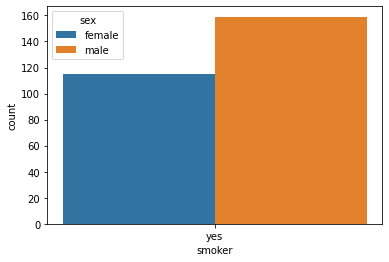

In [116]:
sns.countplot('smoker', hue = 'sex', data=smokers)

In [117]:
n_females = dataset[dataset.sex=='female'].shape[0] ## total number of females
n_males = dataset[dataset.sex=='male'].shape[0] ## total number of males

female_smokers = smokers[smokers.sex=='female'].shape[0] ## total number of female smokers
male_smokers = smokers[smokers.sex=='male'].shape[0] ## total number of male smokers

female_non_smokers = n_females - female_smokers
male_non_smokers = n_males - male_smokers

In [118]:
chi_sq_stat, p_value, df, x = chi2_contingency([[female_non_smokers, female_smokers],[male_non_smokers, male_smokers]])

In [119]:
evaluateNullHypothesis(p_value, type1error)

As the p_value (0.006548143503580696) < 0.05, we reject the Null Hypothesis.


### Is the distribution of bmi across women with no children, one child and two children, the same?

* H0 - BMI is uniform across women with different number of children
* H1 - BMI is different across women with different number of children

In [120]:
females = dataset[dataset.sex == 'female'] ## dataset with all Females

In [121]:
female_no_child = females[females.children==0]['bmi'] ## BMIs of Females with no children
female_one_child = females[females.children==1]['bmi'] ## BMIs of Females with one children
female_two_child = females[females.children==2]['bmi'] ## BMIs of Females with two children

In [122]:
stat, p_value = f_oneway(female_no_child, female_one_child, female_two_child)

In [123]:
evaluateNullHypothesis(p_value, type1error)

As the p_value (0.7158579926754841) > 0.05, we fail to reject Null Hypothesis
